In [2]:

import tensorflow as tf
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np


KeyboardInterrupt: 

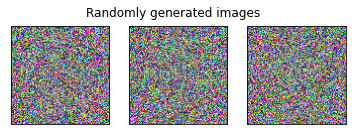

In [2]:
def rand_img(size):
    return np.random.randint(0, 256, size) / 255.0
plt.figure(num=1, figsize=(6, 2))
for i in range(3):
    plt.subplot(1, 3, i+1), plt.imshow(rand_img((100, 100, 3)))
    plt.xticks([])
    plt.yticks([])
    plt.suptitle("Randomly generated images")


In [3]:
def rand_sentence(len, max):
    return np.random.randint(0, max, len)


def onehot(sentece, max):
    onehot = np.zeros((len(sentece), max))
    for i, v in enumerate(sentece):
        onehot[i, v] = 1
    return onehot


In [4]:
str1 = ""
for i in range(5):
    result = str1.join(chr(int(j)) for j in rand_sentence(100, 256))
    print(result)


ÚErZC¿-ô©Z¼¢ëêM·©¿½C"y¯å¹þÖ o/Ã²ÁñÕÿ¶}1#"5Ì¯K[Ù%4Ó±w+Cr¥pWÒ¹- 	vâ£äÉ	w_¥²o
g3Pwk+fEÀu¨A!îº\¸ÜÆGy9sêùi"5çÇNHV0»óH.ùÚòÈ ¢º³X]¬¸j
Ö¡Q=_W`Mclõ!¿)jÞ¬ Íév(Á¾	Ç¹i	±'_T2o.[7úZ	"${qGIg?íUüDpÎ5±0®?x¤(A¿ofÕzIx`Æ
nß¦;×6x/é_]¯wmQ6&-ýï0V)SÚS¹d¶1È¾÷4_+È÷Ü­ó$¦_n8®R´ ÄRì]ÌÅÑÊ­!dßJøKÏ°¶aK¿_t}ç
éY@»ãLãa_Oú¥Æ
_Ûkè,ø1Q³áÅw7cr<åÓÙo
ºV]èÞ,ÔÉóZ/é¬nBÚÚ} ´ ¨BqÖu"oy5Ë´Hbâã%1


In [5]:
def data_generator(image_size, sentence_len, sentence_max, batch_size=32):
    while True:
        x_img = np.zeros(
            (batch_size, image_size[0], image_size[1], image_size[2]))
        x_sen = np.zeros((batch_size, sentence_len))
        y_img = np.zeros(
            (batch_size, image_size[0], image_size[1], image_size[2]))
        y_sen = np.zeros((batch_size, sentence_len, sentence_max))
        for i in range(batch_size):
            img = rand_img(image_size)
            sentence = rand_sentence(sentence_len, sentence_max)
            sentence_onehot = onehot(sentence, sentence_max)
            x_img[i] = img
            x_sen[i] = sentence
            y_img[i] = img
            y_sen[i] = sentence_onehot
        yield [x_img, x_sen], [y_img, y_sen]


In [6]:
image_shape = (100, 100, 3)
sentence_len = 100
max_word = 256

input_img = Input(image_shape)
input_sen = Input((sentence_len,))
embed_sen = Embedding(max_word, 100)(input_sen)
flat_emb_sen = Flatten()(embed_sen)
flat_emb_sen = Reshape((image_shape[0], image_shape[1], 1))(flat_emb_sen)
trans_input_img = Conv2D(20, 1, activation="relu")(input_img)
enc_input = Concatenate(axis=-1)([flat_emb_sen, trans_input_img])
out_img = Conv2D(3, 1, activation='relu',
                 name='image_reconstruction')(enc_input)

decoder_model = Sequential(name="sentence_reconstruction")
decoder_model.add(Conv2D(1, 1, input_shape=(100, 100, 3)))
decoder_model.add(Reshape((sentence_len, 100)))
decoder_model.add(TimeDistributed(Dense(max_word, activation="softmax")))
out_sen = decoder_model(out_img)

model = Model(inputs=[input_img, input_sen], outputs=[out_img, out_sen])
model.compile('adam', loss=['mae', 'categorical_crossentropy'], metrics={
              'sentence_reconstruction': 'categorical_accuracy'})
encoder_model = Model(inputs=[input_img, input_sen], outputs=[out_img])


In [7]:
image_shape = (100, 100, 3)
sentence_len = 100
max_word = 256

gen = data_generator(image_shape, sentence_len, max_word, 64)

model.fit(gen, epochs=16, steps_per_epoch=50, callbacks=[ModelCheckpoint(
    "best_model.h5", monitor="loss", save_best_only=True), TensorBoard(log_dir='logs', histogram_freq=0, write_graph=True, write_images=False)])


Epoch 1/16
50/50 [==============================] - 18s 33ms/step - loss: 5.9238 - image_reconstruction_loss: 0.4177 - sentence_reconstruction_loss: 5.5060 - sentence_reconstruction_categorical_accuracy: 0.0124
Epoch 2/16
50/50 [==============================] - 1s 30ms/step - loss: 5.5849 - image_reconstruction_loss: 0.2806 - sentence_reconstruction_loss: 5.3043 - sentence_reconstruction_categorical_accuracy: 0.1060
Epoch 3/16
50/50 [==============================] - 2s 31ms/step - loss: 4.8232 - image_reconstruction_loss: 0.2293 - sentence_reconstruction_loss: 4.5939 - sentence_reconstruction_categorical_accuracy: 0.6852
Epoch 4/16
50/50 [==============================] - 2s 33ms/step - loss: 2.5797 - image_reconstruction_loss: 0.2579 - sentence_reconstruction_loss: 2.3218 - sentence_reconstruction_categorical_accuracy: 0.9999
Epoch 5/16
50/50 [==============================] - 2s 33ms/step - loss: 0.5049 - image_reconstruction_loss: 0.2904 - sentence_reconstruction_loss: 0.2146 - se